<a href="https://colab.research.google.com/github/HEMANTHSAINI/colab/blob/MASTER/digit_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print(pd.Series(y).value_counts())
classes = ['0', '1', '2','3', '4','5', '6', '7', '8', '9']
nclasses = len(classes)

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
dtype: int64


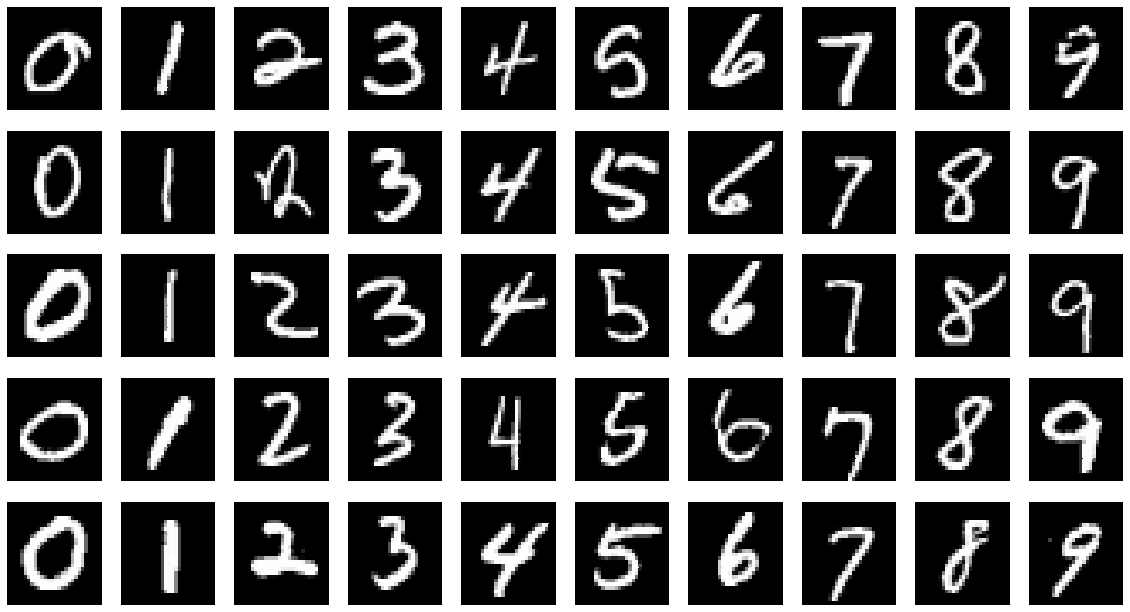

In [3]:
samples_per_class = 5
figure = plt.figure(figsize=(nclasses*2,(1+samples_per_class*2)))

idx_cls = 0
for cls in classes:
  idxs = np.flatnonzero(y == cls)
  idxs = np.random.choice(idxs, samples_per_class, replace=False)
  i = 0
  for idx in idxs:
    plt_idx = i * nclasses + idx_cls + 1
    p = plt.subplot(samples_per_class, nclasses, plt_idx);
    p = sns.heatmap(np.reshape(X[idx], (28,28)), cmap=plt.cm.gray, 
             xticklabels=False, yticklabels=False, cbar=False);
    p = plt.axis('off');
    i += 1
  idx_cls += 1

In [4]:
print(len(X))
print(len(X[0]))

70000
784


In [5]:
print(X[0])
print(y[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9, train_size=7500, test_size=2500)

#scaling the features
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [7]:
clf = LogisticRegression(solver='saga', multi_class='multinomial').fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [8]:
y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9


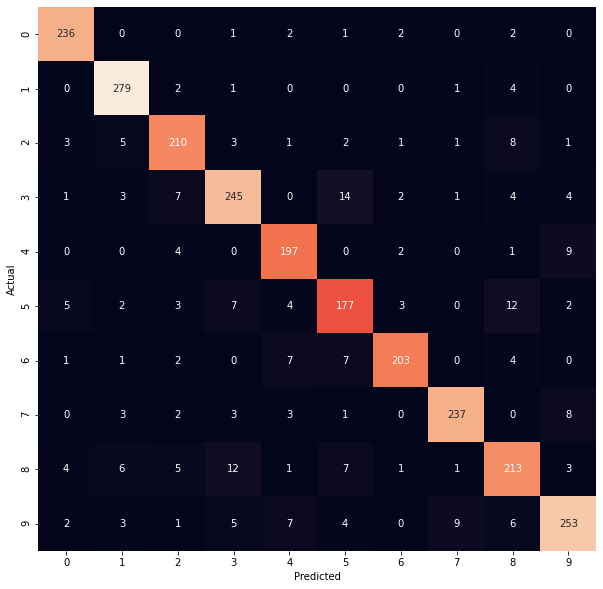

In [9]:
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

p = plt.figure(figsize=(10,10));
p = sns.heatmap(cm, annot=True, fmt="d", cbar=False)